# Fruit and Vegetable Consumption Analysis Across Different Age Groups in the US in 2021


In [1]:
#Import dependencies 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from pathlib import Path

#Set Path & import/read dataset from a csv files 
file1 = Path('data/Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
file2 = Path ('data/Income_Behavioral_Risk_Factor_Surveillance_system.csv')

age_group_df = pd.read_csv(file1)
income_df = pd.read_csv(file2)

#Merge of both files based on Location ID column 
data_df = pd.merge(age_group_df, income_df, on='LocationID', how='inner')

#Preview of the DataFrame
data_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Datasource_x,Class_x,Topic_x,Question_x,Data_Value_Unit_x,Data_Value_Type_x,...,Race/Ethnicity_y,GeoLocation_y,ClassID_y,TopicID_y,QuestionID_y,DataValueTypeID_y,StratificationCategory1_y,Stratification1_y,StratificationCategoryId1_y,StratificationID1_y
0,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,Income,"Less than $15,000",INC,INCLESS15
1,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,Income,"Less than $15,000",INC,INCLESS15
2,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,Income,"$25,000 - $34,999",INC,INC2535
3,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,Income,"$50,000 - $74,999",INC,INC5075
4,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,Income,"$50,000 - $74,999",INC,INC5075


Data Cleaning

In [2]:
# Dataframe count to see if there are any rows with missing data
data_df.count()

YearStart_x                    259182
YearEnd_x                      259182
LocationAbbr_x                 259182
LocationDesc_x                 259182
Datasource_x                   259182
Class_x                        259182
Topic_x                        259182
Question_x                     259182
Data_Value_Unit_x                   0
Data_Value_Type_x              259182
Data_Value_x                   256872
Data_Value_Alt_x               256872
Data_Value_Footnote_Symbol       2310
Data_Value_Footnote              2310
Low_Confidence_Limit           256872
High_Confidence_Limit          256872
Sample_Size                    256872
Total                               0
Age(years)                     259182
Education                           0
Gender                              0
Income_x                            0
Race/Ethnicity_x                    0
GeoLocation_x                  259182
ClassID_x                      259182
TopicID_x                      259182
QuestionID_x

In [3]:
#Check the datatypes of each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259182 entries, 0 to 259181
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   YearStart_x                  259182 non-null  int64  
 1   YearEnd_x                    259182 non-null  int64  
 2   LocationAbbr_x               259182 non-null  object 
 3   LocationDesc_x               259182 non-null  object 
 4   Datasource_x                 259182 non-null  object 
 5   Class_x                      259182 non-null  object 
 6   Topic_x                      259182 non-null  object 
 7   Question_x                   259182 non-null  object 
 8   Data_Value_Unit_x            0 non-null       float64
 9   Data_Value_Type_x            259182 non-null  object 
 10  Data_Value_x                 256872 non-null  float64
 11  Data_Value_Alt_x             256872 non-null  float64
 12  Data_Value_Footnote_Symbol   2310 non-null    object 
 13 

In [4]:
#Check the column's names to start removal process
data_df.columns

Index(['YearStart_x', 'YearEnd_x', 'LocationAbbr_x', 'LocationDesc_x',
       'Datasource_x', 'Class_x', 'Topic_x', 'Question_x', 'Data_Value_Unit_x',
       'Data_Value_Type_x', 'Data_Value_x', 'Data_Value_Alt_x',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income_x',
       'Race/Ethnicity_x', 'GeoLocation_x', 'ClassID_x', 'TopicID_x',
       'QuestionID_x', 'DataValueTypeID_x', 'LocationID',
       'StratificationCategory1_x', 'Stratification1_x',
       'StratificationCategoryId1_x', 'StratificationID1_x', 'YearStart_y',
       'YearEnd_y', 'LocationAbbr_y', 'LocationDesc_y', 'Datasource_y',
       'Class_y', 'Topic_y', 'Question_y', 'Data_Value_Unit_y',
       'Data_Value_Type_y', 'Data_Value_y', 'Data_Value_Alt_y', 'Income_y',
       'Race/Ethnicity_y', 'GeoLocation_y', 'ClassID_y', 'TopicID_y',
       'QuestionID_y', 'DataValueTypeID_y', '

In [5]:
#Delete the unwanted columns to create a new dataframe with only the relevant columns
reduced_df = data_df[['YearStart_x','YearEnd_x','LocationAbbr_x','LocationDesc_x','Class_x','Question_x','Data_Value_x', 'Age(years)', 'LocationID', 'Income_y']]
reduced_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Class_x,Question_x,Data_Value_x,Age(years),LocationID,Income_y
0,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
1,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
2,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$25,000 - $34,999"
3,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"
4,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"


In [6]:
#Finding the number of missing values in each column
reduced_df.isnull().sum()

YearStart_x          0
YearEnd_x            0
LocationAbbr_x       0
LocationDesc_x       0
Class_x              0
Question_x           0
Data_Value_x      2310
Age(years)           0
LocationID           0
Income_y             0
dtype: int64

In [7]:
#Remove all missing values from dataframe 
reduced_df = reduced_df.dropna(how='any')
reduced_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Class_x,Question_x,Data_Value_x,Age(years),LocationID,Income_y
0,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
1,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
2,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$25,000 - $34,999"
3,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"
4,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"


In [8]:
#Rename columns for context 
reduced_df = reduced_df.rename(columns={'YearStart_x' : 'Year,Start','YearEnd_x' : 'YearEnd','LocationAbbr_x' : 'LocationAbbr','LocationDesc_x' : 'LocationDesc', 'Class_x' : 'Class', 'Question_x' :'Question',
                               'Data_Value_x' : 'Percentage','Age(years)': 'AgeRange', 'Income_y' : 'Income'})
#Rearrange columns
reduced_df = reduced_df[['Year,Start','YearEnd','LocationID','LocationAbbr','LocationDesc', 'Class', 'Question','Percentage','AgeRange', 'Income']]
reduced_df.head()

,"Year,Start",YearEnd,LocationID,LocationAbbr,LocationDesc,Class,Question,Percentage,AgeRange,Income
0,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"Less than $15,000"
1,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"Less than $15,000"
2,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$25,000 - $34,999"
3,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$50,000 - $74,999"
4,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$50,000 - $74,999"


Identify US states with the highest and lowest levels of fruit and vegetable consumption among different age groups


In [9]:
#Statistical analysis in all US states
reduced_df.describe()

,"Year,Start",YearEnd,LocationID,Percentage
count,256872.000000,256872.000000,256872.000000,256872.000000
mean,2021.000000,2021.000000,29.113309,29.975629
std,0.741864,0.741864,15.664100,8.980777
min,2020.000000,2020.000000,1.000000,7.700000
25%,2020.000000,2020.000000,17.000000,22.275000
50%,2021.000000,2021.000000,29.000000,31.200000
75%,2022.000000,2022.000000,42.000000,36.800000
max,2022.000000,2022.000000,56.000000,56.500000


In [11]:
#Define the age categories
age_categories=reduced_df['AgeRange'].unique()

#Define the question to filter our datagframe for each
questions = ['Percent of adults who report consuming fruit less than one time daily', 
             'Percent of adults who report consuming vegetables less than one time daily']

#Empty list to store our results
results_age = []

#Iterate over question and age category in our dataframe 
for question in questions:
    for age_category in age_categories:
        #Filter the dataframe for the current question and age range
        filtered_df = reduced_df[(reduced_df['Question'] == question) & (reduced_df['AgeRange']==age_category)]

        if not filtered_df.empty:
            #Find the index of the maximum Percentage
            max_row = filtered_df.loc[filtered_df['Percentage'].idxmax()]
            #Find the index of the minimun Percentage
            min_row = filtered_df.loc[filtered_df['Percentage'].idxmin()]

            #Appened the results in the results list
            results_age.append({'Question':question,
                            'AgeRange': age_category,
                            'Highest State':max_row['LocationDesc'],
                            'Highest_Value':max_row['Percentage'],
                            'Lowest_State':min_row['LocationDesc'],
                            'Lowest_Value':min_row['Percentage'], 
                            }) 
            
#Display the results
results_age_df = pd.DataFrame(results_age)
results_age_df = results_age_df.set_index(['AgeRange']).sort_values('AgeRange')

#Assigning a MultiIndex to the columns of the DataFrame
results_age_df.columns = pd.MultiIndex.from_product([['Fruit and Vegetable Consumption'],results_age_df.columns])

#Display of complete 'Question' column values in our dataframe we use the set_option
pd.set_option('display.max_colwidth',None)

results_age_df 

Fruit and Vegetable Consumption  \
                                                                               Question   
AgeRange                                                                                  
18 - 24           Percent of adults who report consuming fruit less than one time daily   
18 - 24      Percent of adults who report consuming vegetables less than one time daily   
25 - 34           Percent of adults who report consuming fruit less than one time daily   
25 - 34      Percent of adults who report consuming vegetables less than one time daily   
35 - 44           Percent of adults who report consuming fruit less than one time daily   
35 - 44      Percent of adults who report consuming vegetables less than one time daily   
45 - 54           Percent of adults who report consuming fruit less than one time daily   
45 - 54      Percent of adults who report consuming vegetables less than one time daily   
55 - 64           Percent of adults who report consuming fruit less than one time daily   
55 - 64      Percent of adults who report consuming vegetables less than one time daily   
65 or older       Percent of adults who report consuming fruit less than one time daily   
65 or older  Percent of adults who report consuming vegetables less than one time daily   

                                                                       \
                    Highest State Highest_Value          Lowest_State   
AgeRange                                                                
18 - 24                    Hawaii          56.5            New Jersey   
18 - 24      District of Columbia          36.9               Vermont   
25 - 34                 Louisiana          53.3  District of Columbia   
25 - 34                    Nevada          25.3                 Maine   
35 - 44                 Louisiana          51.8           Connecticut   
35 - 44                      Iowa          22.9                 Maine   
45 - 54                  Oklahoma          51.6  District of Columbia   
45 - 54                 Louisiana          27.0                 Maine   
55 - 64                  Arkansas          51.5            California   
55 - 64                 Louisiana          26.2                 Idaho   
65 or older           Mississippi          45.0  District of Columbia   
65 or older             Louisiana          26.5                 Maine   

                          
            Lowest_Value  
AgeRange                  
18 - 24             36.9  
18 - 24             16.0  
25 - 34             34.7  
25 - 34             13.5  
35 - 44             31.4  
35 - 44             10.8  
45 - 54             33.8  
45 - 54             11.0  
55 - 64             32.2  
55 - 64             13.1  
65 or older         26.6  
65 or older         12.5

In [19]:
#Statistical analysis (average) of fruit & vegetable consumption between highest & lowest ranking US states among different age groups
results_age_df.describe()

Fruit and Vegetable Consumption             
                        Highest_Value Lowest_Value
count                       12.000000    12.000000
mean                        39.541667    22.708333
std                         13.271532    10.678054
min                         22.900000    10.800000
25%                         26.425000    12.950000
50%                         40.950000    21.300000
75%                         51.650000    32.600000
max                         56.500000    36.900000

Bar Chart: Highest & Lowest % of Adults who report consuming fruits < 1 time daily across the US

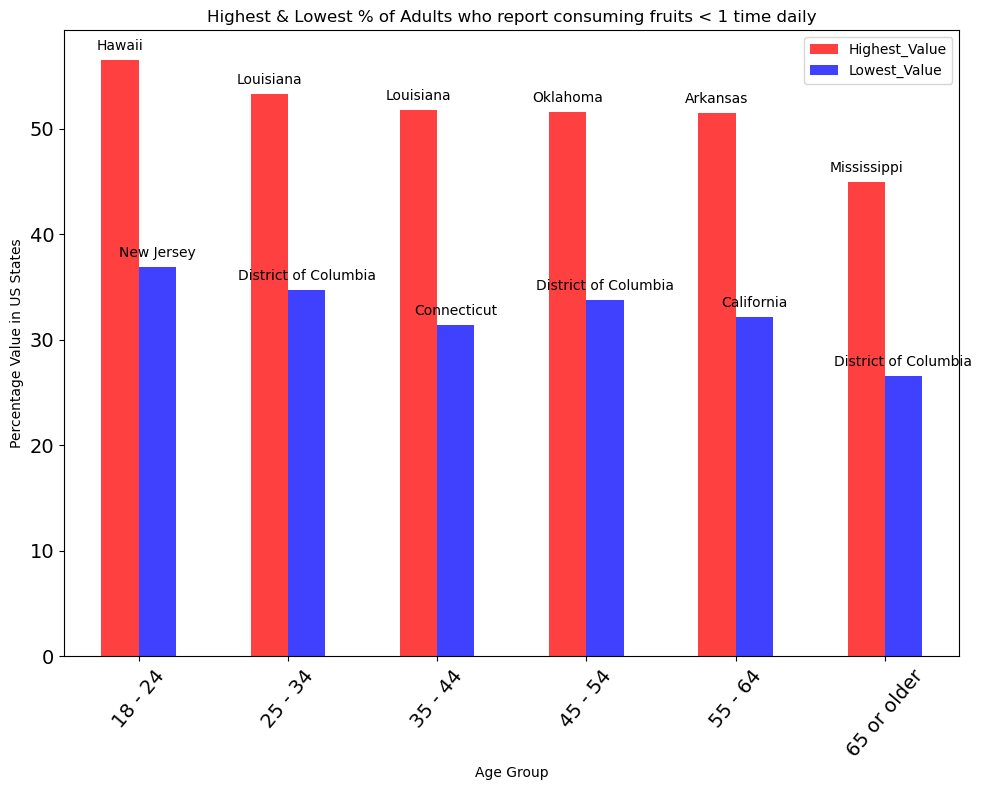

In [20]:
#Barchart for visualizing US states with highest & lowest consumption of fruit in different age groups
#filter our dataframe for fruit question
fruit = pd.DataFrame(results_age)
fruit = fruit.loc[(fruit['Question']=='Percent of adults who report consuming fruit less than one time daily')] 
fruit = fruit.set_index('AgeRange').sort_values('AgeRange')

#plotting our analysis findings for fruit consumption in different age groups across US
figure1 = fruit.plot(kind='bar', color=['red','blue'], alpha=0.75, figsize=(10,8),
title='Highest & Lowest % of Adults who report consuming fruits < 1 time daily',
xlabel='Age Group',ylabel='Percentage Value in US States', fontsize=14)
#setting states label for each of bars in the barplot
h_state = fruit['Highest State']
l_state = fruit['Lowest_State']

#bar labels for states with highest and lowest obesity value for our plot figure
figure1.bar_label(figure1.containers[0],h_state, padding=5,label_type='edge')
figure1.bar_label(figure1.containers[1],l_state, padding =5,label_type='edge')

#save to image folder
plt.savefig("Images/BarChartFruit")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

Bar Chart: Highest & Lowest % of Adults who report consuming vegetables < 1 time daily across the US

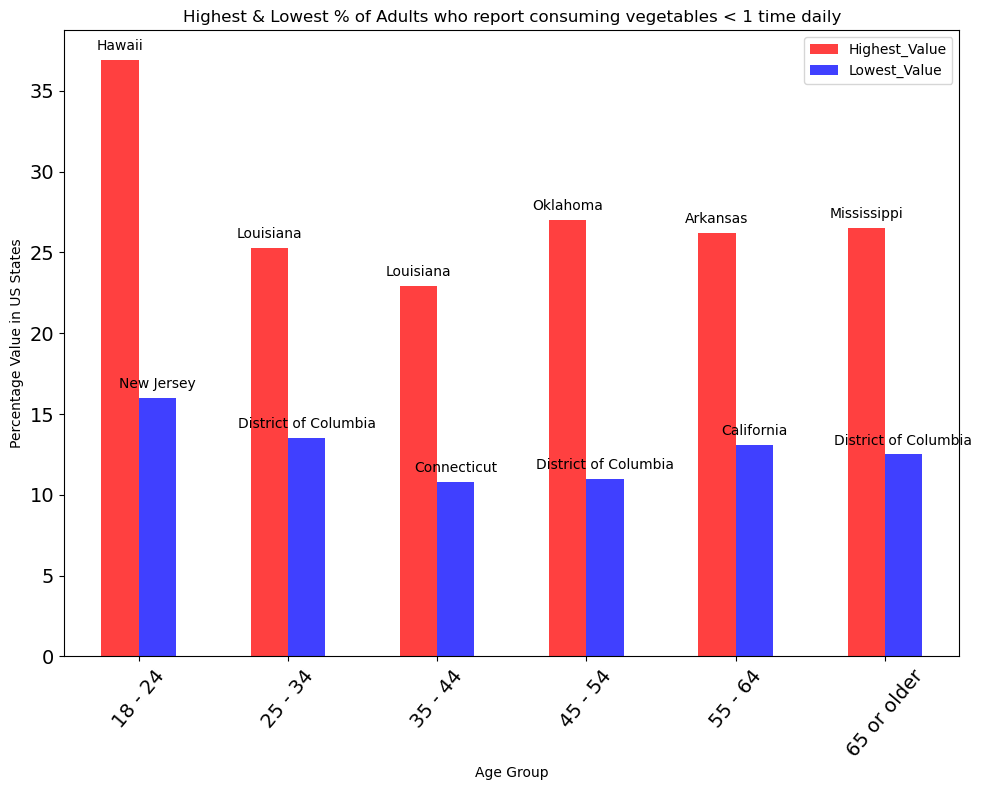

In [21]:
# Barchart for visualizing states with highest & lowest consumption of vegetables in different age groups
#filter our dataframe for vegetable question
veggie = pd.DataFrame(results_age)
veggie = veggie.loc[(veggie['Question']=='Percent of adults who report consuming vegetables less than one time daily')]  
veggie = veggie.set_index('AgeRange').sort_values('AgeRange')

#plotting our analysis findings for vegetables consumption in different age groups across US
figure1 = veggie.plot(kind='bar', color=['red','blue'], alpha=0.75, figsize=(10,8),
title='Highest & Lowest % of Adults who report consuming vegetables < 1 time daily',
xlabel='Age Group',ylabel='Percentage Value in US States', fontsize=14)
#setting states label for each of bars in the barplot
h_state = fruit['Highest State']
l_state = fruit['Lowest_State']

#bar labels for states with highest and lowest obesity value for our plot figure
figure1.bar_label(figure1.containers[0],h_state, padding=5,label_type='edge')
figure1.bar_label(figure1.containers[1],l_state, padding = 5,label_type='edge')

#save to image folder
plt.savefig("Images/BarChartVeggies")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

Scatter plot for Highest Values for fruits and vegetables consumption based on age group 

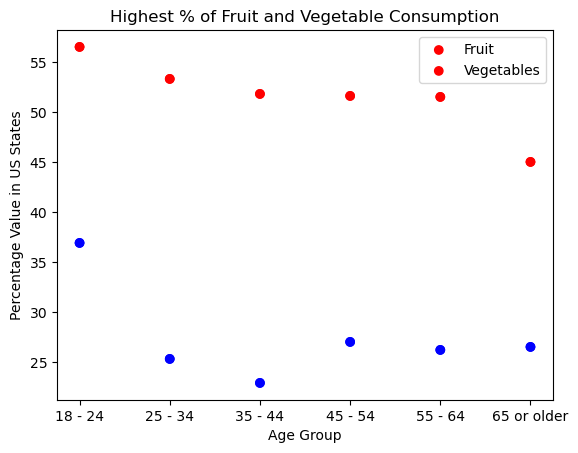

In [22]:
#Scatter plot for Highest Values for fruits and vegetables based on age group
x_axis = results_age_df.index
y_axis = results_age_df['Fruit and Vegetable Consumption', 'Highest_Value']
colors = ['red' if value > 40 else 'blue' for value in y_axis]

fruit = plt.scatter(x_axis, y_axis, color=colors, label='Fruit')
vegetables = plt.scatter(x_axis, y_axis, color=colors, label='Vegetables')

plt.ylabel('Percentage Value in US States')
plt.xlabel('Age Group')
plt.title('Highest % of Fruit and Vegetable Consumption')
plt.legend(handles=[fruit, vegetables], loc='best')
#save to image folder
plt.savefig("Images/ScatterHighest")
plt.show()

Scatter plot for Lowest Values for fruits and vegetables consumption based on age group 

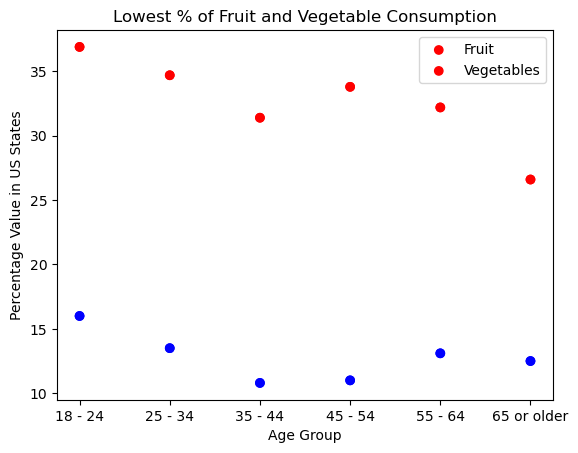

In [23]:
#Scatter plot for Lowest Values for fruits and vegetables based on age group
x_axis = results_age_df.index
y_axis = results_age_df['Fruit and Vegetable Consumption', 'Lowest_Value']
color = ['red' if value > 25 else 'blue' for value in y_axis]

fruit = plt.scatter(x_axis, y_axis, color=colors, label='Fruit')
vegetables = plt.scatter(x_axis, y_axis, color=colors, label='Vegetables')

plt.ylabel('Percentage Value in US States')
plt.xlabel('Age Group')
plt.title('Lowest % of Fruit and Vegetable Consumption')
plt.legend(handles=[fruit, vegetables], loc='best')
#save to image folder
plt.savefig("Images/ScatterLowest")
plt.show()

Correlation between eating habits in relation to fruit and vegetables consumption across the US

The main takeaways from this analysis based on the eating habits are:

1.) The US does not meet minimum requirements of fruit and vegetables as recommended by The U.S. Departments of Agriculture (USDA) and Health and Human Services (HHS). The 2020–2025 Dietary Guidelines for Americans advise adults should consume 1.5–2 cup-equivalents of fruits and 2–3 cup-equivalents of vegetables daily. Only 12-10% of surveyed adults met fruit and vegetables intake recommendations.  
2.) On average, 29.97% of the US respondents consumes daily recommendations of fruit and vegetables. The standard deviation on this average is 8.98% which may suggest that 
the values in the dataset are fairly reliable.
3.) Adults who reported consuming fruit less than once time daily are mainly located in the southeast of the US (highest and lowest rankings).
4.) Adults who reported consuming vegetables less than once time daily are also located in the southeast of the US. The least number of adults who reported consuming vegetables less than once time daily are located in the New England region of the US (most of them being in Maine).
5.) Age seems to play an important role in the consumption of fruits and vegatbles. We notice a pattern of decreasing percentages as respondents get older (the older you get, the healthier choices you make in your fruit/vegetable intake). 
6.) Other factors that may have an effect on this findings are: geographical location, socio-economic status, cost, access, and nutrional education.
